## Logistic Regression

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
# Load the diabetes dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI' 'DiabetesPedigreeFunction', 'Age', 'Outcome']

In [3]:
df = pd.read_csv(url, names=columns)

In [4]:
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMIDiabetesPedigreeFunction,Age,Outcome
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1


In [5]:
# separate feturs and target
x = df.drop(columns=['Outcome'])
y = df['Outcome']

In [6]:
# split into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
# initialize logistic Regression model
model = LogisticRegression()

In [9]:
# train the model
model.fit(x_train,y_train)

LogisticRegression()

In [10]:
# predict on the test datasets
y_pred = model.predict(x_test)

In [11]:
# accuracy score
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.7662337662337663

In [12]:
# confusion metrics
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_pred)

array([[82, 17],
       [19, 36]], dtype=int64)

In [13]:
# classification report
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82        99
           1       0.68      0.65      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.77       154



In [14]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMIDiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [15]:
def predicted_values():
    Pregnancies = float(input('Enter Pregnancies: '))
    Glucose = float(input('Enter Glucose: '))
    BloodPressure = float(input('Enter BloodPressure: '))
    SkinThickness = float(input('Enter SkinThickness: '))
    Insulin = float(input('Enter Insulin: '))
    BMIDiabetesPedigreeFunction = float(input('Enter BMIDiabetesPedigreeFunction: '))
    Age = float(input('Enter Age: '))
    
    data = np.array([[Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMIDiabetesPedigreeFunction, Age]])
    
    prediction = model.predict(data)
    
    if prediction == 0:
        print('The person is not diabetics')
    else:
        print('The person is diabetics')
predicted_values()

The person is not diabetics


c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# Support Vector Machine

In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.datasets import load_diabetes

In [18]:
# load the diabates dataset
diabetes = load_diabetes()

In [19]:
data = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

In [20]:
data['target'] = diabetes.target

In [21]:
data.head(3)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0


In [22]:
X = data.drop(columns=['target'])

In [23]:
y = (data['target'] > data['target'].median()).astype(int)

In [24]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (353, 10)
Testing set size: (89, 10)


In [26]:
# initialize the support vector mahcine classifier
model = SVC(kernel='linear')

In [28]:
# train the model
model.fit(X_train,y_train)

SVC(kernel='linear')

In [29]:
# make precitioons on the test set
y_pred = model.predict(X_test)

In [30]:
accuracy_score(y_test,y_pred)

0.7528089887640449

In [31]:
confusion_matrix(y_test,y_pred)

array([[39, 10],
       [12, 28]], dtype=int64)

In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.80      0.78        49
           1       0.74      0.70      0.72        40

    accuracy                           0.75        89
   macro avg       0.75      0.75      0.75        89
weighted avg       0.75      0.75      0.75        89



# KNeighbors

In [33]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.datasets import load_diabetes

In [34]:
diabetes = load_diabetes()

In [35]:
data = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

In [36]:
data['target'] = diabetes.target

In [37]:
data.head(3)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0


In [38]:
X = data.drop(columns=['target'])

In [39]:
y = (data['target'] > data['target'].median()).astype(int) 

In [40]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (353, 10)
Testing set size: (89, 10)


In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
# initialize the standard scaler
scaler = StandardScaler()

In [44]:
# scale the trainign and testing features
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

In [45]:
# initialize the KNN classifier
model = KNeighborsClassifier(n_neighbors=5)

In [46]:
# train the model
model.fit(x_train,y_train)

KNeighborsClassifier()

In [47]:
# make predictions on the test set
y_pred = model.predict(x_test)

In [48]:
accuracy_score(y_test,y_pred)

0.6853932584269663

In [49]:
confusion_matrix(y_test,y_pred)

array([[35, 14],
       [14, 26]], dtype=int64)

In [51]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71        49
           1       0.65      0.65      0.65        40

    accuracy                           0.69        89
   macro avg       0.68      0.68      0.68        89
weighted avg       0.69      0.69      0.69        89



In [72]:
accuracy = []
k_range = range(1,11)

for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy.append(accuracy_score(y_test, y_pred))
    # print(f"Accuracy for k={k}: {accuracy:.2f}")

In [73]:
import matplotlib.pyplot as plt

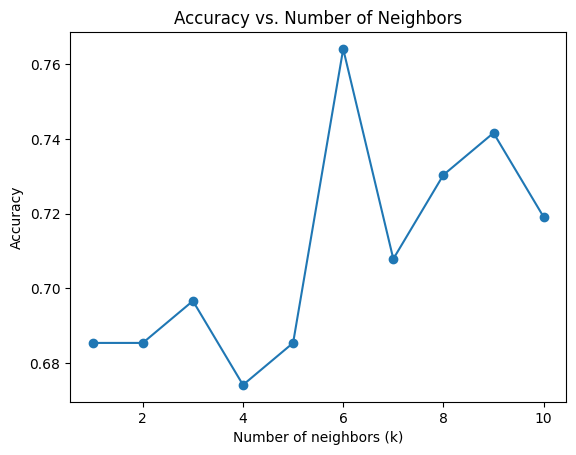

In [75]:
# plot
plt.plot(k_range,accuracy, marker='o')
plt.xlabel('Number of neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Neighbors')
plt.show()

# Random Forest classifer

In [86]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.datasets import load_diabetes

In [77]:
# Load the diabetes dataset
diabetes = load_diabetes()

In [78]:
# covert to a pandas datafram for conveince
data = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

In [80]:
data['target'] = diabetes.target

In [81]:
data.head(2)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0


In [82]:
X = data.drop(columns=['target'])  # Features

In [83]:
# Convert target to binary classification (0: no diabetes, 1: diabetes)
y = (data['target'] > data['target'].median()).astype(int)  # 1 for high target, 0 for low target

In [84]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (353, 10)
Testing set size: (89, 10)


In [87]:
# initialize the random forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [88]:
# train the model
model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [89]:
y_pred = model.predict(X_test)

In [90]:
accuracy_score(y_test,y_pred)

0.7191011235955056

In [91]:
confusion_matrix(y_test,y_pred)

array([[37, 12],
       [13, 27]], dtype=int64)

In [93]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.76      0.75        49
           1       0.69      0.68      0.68        40

    accuracy                           0.72        89
   macro avg       0.72      0.72      0.72        89
weighted avg       0.72      0.72      0.72        89



In [101]:
# get features importance
features_importance = pd.DataFrame({
    'Feature' : diabetes.feature_names,
    'Importance' : model.feature_importances_
}).sort_values('Importance',ascending=False)

In [102]:
features_importance

,Feature,Importance
2,bmi,0.208086
8,s5,0.160413
3,bp,0.118684
5,s2,0.092859
6,s3,0.091283
9,s6,0.084323
4,s1,0.079738
0,age,0.078318
7,s4,0.066106
1,sex,0.020190


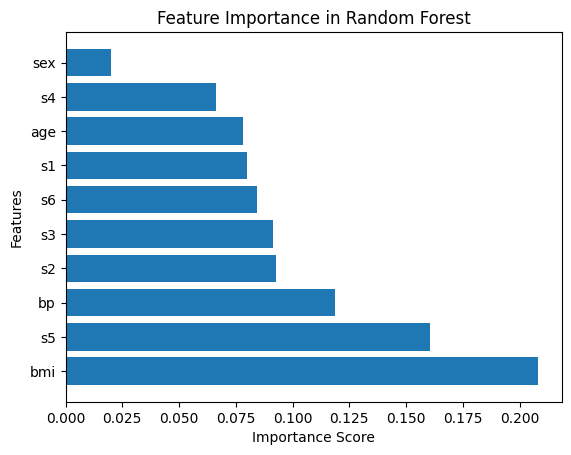

In [108]:
import matplotlib.pyplot as plt

# plot feautes importance
plt.barh(features_importance['Feature'], features_importance['Importance'])
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance in Random Forest')
# plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

# Decision Tree

In [109]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.datasets import load_diabetes

In [110]:
# Load the diabetes dataset
diabetes = load_diabetes()

In [112]:
# Convert to a pandas DataFrame for convenience
data = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

In [113]:
data['target'] = diabetes.target

In [114]:
data.head(2)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0


In [115]:
X = data.drop(columns=['target'])  # Features
y = (data['target'] > data['target'].median()).astype(int)  # Binary classes

In [116]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [117]:
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (353, 10)
Testing set size: (89, 10)


In [118]:
model = DecisionTreeClassifier(random_state=42, max_depth=5)  # Adjust max_depth for better performance

In [119]:
# Train the model
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [120]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [121]:
accuracy_score(y_test, y_pred)

0.7303370786516854

In [122]:
confusion_matrix(y_test, y_pred)

array([[35, 14],
       [10, 30]], dtype=int64)

In [124]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.71      0.74        49
           1       0.68      0.75      0.71        40

    accuracy                           0.73        89
   macro avg       0.73      0.73      0.73        89
weighted avg       0.73      0.73      0.73        89



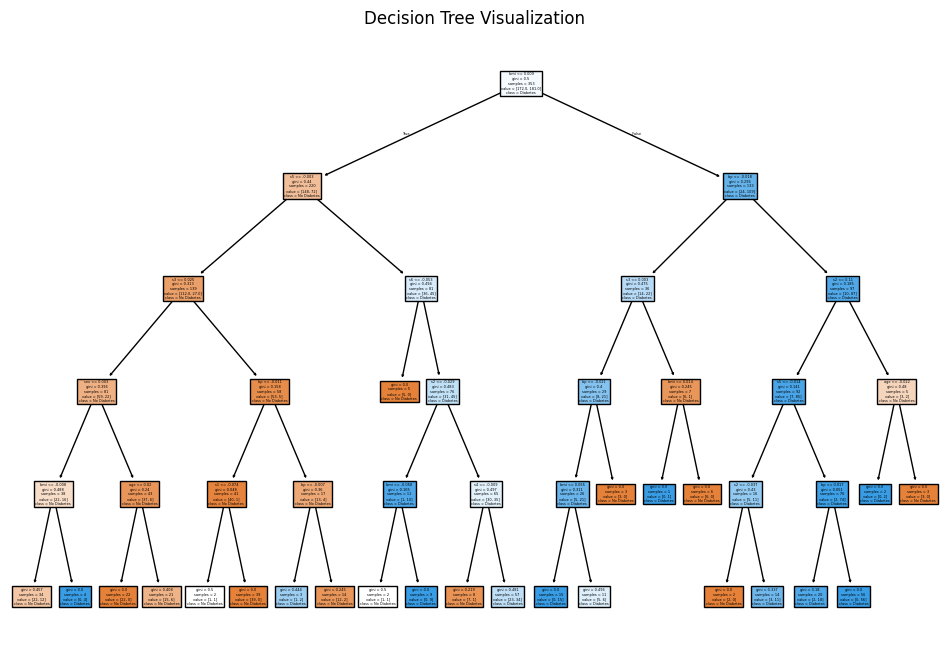

In [125]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=diabetes.feature_names, class_names=['No Diabetes', 'Diabetes'], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

# Plastic Waste

In [128]:
df = pd.read_csv("Plastic Waste Around the World.csv")

In [129]:
df.head(3)

,Country,Total_Plastic_Waste_MT,Main_Sources,Recycling_Rate,Per_Capita_Waste_KG,Coastal_Waste_Risk
0,China,59.08,Packaging_Industrial,29.8,41.2,High
1,United States,42.02,Packaging_Consumer,32.1,127.5,Medium
2,India,26.33,Consumer_Goods,11.5,19.3,High


In [130]:
df.shape

(165, 6)

In [131]:
df.columns

Index(['Country', 'Total_Plastic_Waste_MT', 'Main_Sources', 'Recycling_Rate',
       'Per_Capita_Waste_KG', 'Coastal_Waste_Risk'],
      dtype='object')

In [132]:
df.describe()

,Total_Plastic_Waste_MT,Recycling_Rate,Per_Capita_Waste_KG
count,165.000000,165.000000,165.000000
mean,1.723515,13.096364,122.255152
std,6.001944,16.687354,222.849695
min,0.010000,0.100000,2.600000
25%,0.120000,1.200000,17.300000
50%,0.510000,5.400000,54.900000
75%,1.330000,16.400000,127.500000
max,59.080000,84.800000,1564.400000


In [133]:
df.describe(include='all')

,Country,Total_Plastic_Waste_MT,Main_Sources,Recycling_Rate,Per_Capita_Waste_KG,Coastal_Waste_Risk
count,165,165.000000,165,165.000000,165.000000,165
unique,165,NaN,10,NaN,NaN,4
top,China,NaN,Consumer_Packaging,NaN,NaN,High
freq,1,NaN,131,NaN,NaN,74
mean,NaN,1.723515,NaN,13.096364,122.255152,NaN
std,NaN,6.001944,NaN,16.687354,222.849695,NaN
min,NaN,0.010000,NaN,0.100000,2.600000,NaN
25%,NaN,0.120000,NaN,1.200000,17.300000,NaN
50%,NaN,0.510000,NaN,5.400000,54.900000,NaN
75%,NaN,1.330000,NaN,16.400000,127.500000,NaN


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 165 non-null    object 
 1   Total_Plastic_Waste_MT  165 non-null    float64
 2   Main_Sources            165 non-null    object 
 3   Recycling_Rate          165 non-null    float64
 4   Per_Capita_Waste_KG     165 non-null    float64
 5   Coastal_Waste_Risk      165 non-null    object 
dtypes: float64(3), object(3)
memory usage: 7.9+ KB


In [137]:
df.isnull().sum()

Country                   0
Total_Plastic_Waste_MT    0
Main_Sources              0
Recycling_Rate            0
Per_Capita_Waste_KG       0
Coastal_Waste_Risk        0
dtype: int64

In [138]:
df.duplicated().sum()

0

In [139]:
df.nunique()

Country                   165
Total_Plastic_Waste_MT    122
Main_Sources               10
Recycling_Rate             83
Per_Capita_Waste_KG       146
Coastal_Waste_Risk          4
dtype: int64

# Top 20 Countries by TPW in Milion Tons

In [140]:
import seaborn as sns

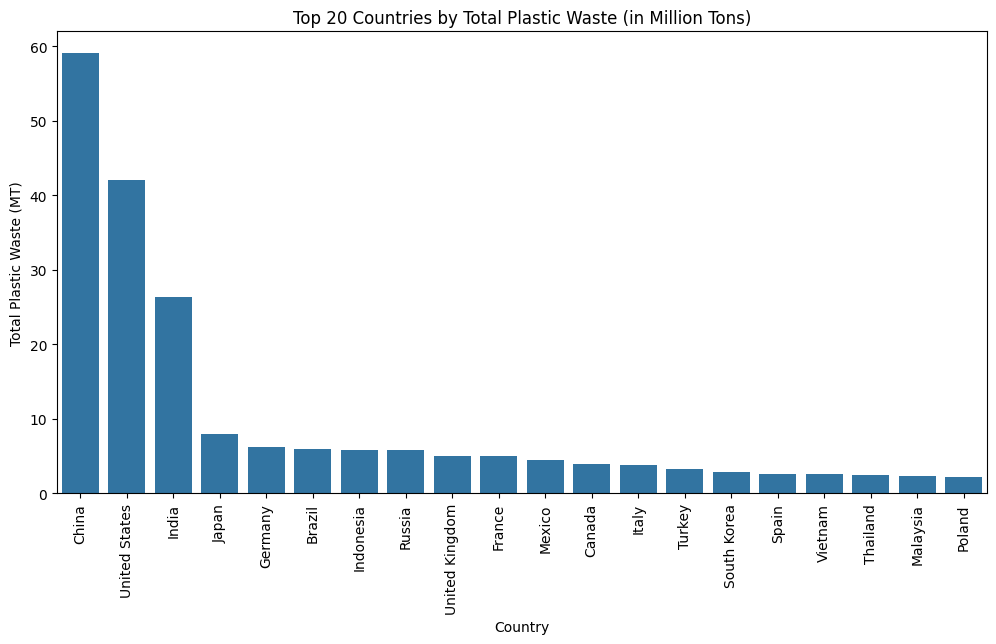

In [146]:
top_20 = df.nlargest(20, 'Total_Plastic_Waste_MT')

plt.figure(figsize=(12, 6))
sns.barplot(data=top_20, x='Country', y='Total_Plastic_Waste_MT')

plt.title('Top 20 Countries by Total Plastic Waste (in Million Tons)')
plt.xlabel('Country')
plt.ylabel('Total Plastic Waste (MT)')
plt.xticks(rotation=90)
plt.show()

# Recycling Rate of Countries

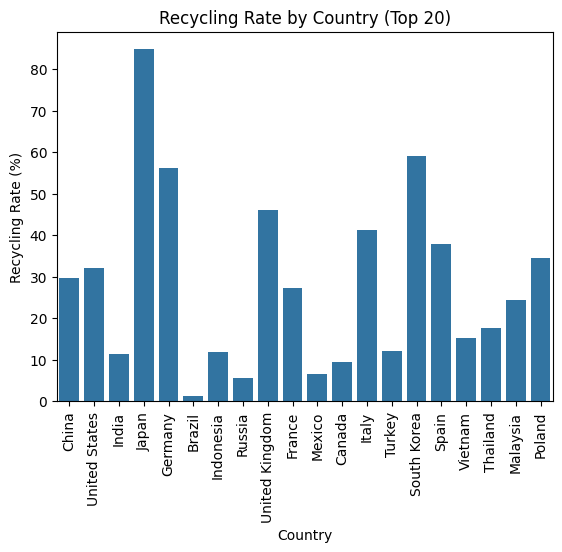

In [147]:
sns.barplot(data=top_20, x='Country', y='Recycling_Rate')

plt.title('Recycling Rate by Country (Top 20)')
plt.xlabel('Country')
plt.ylabel('Recycling Rate (%)')
plt.xticks(rotation=90)
plt.show()

# Per Capita Plastic Waste by Countries

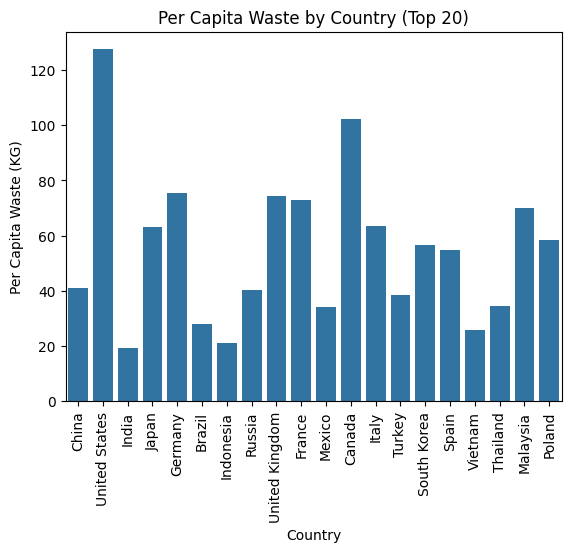

In [148]:
sns.barplot(data=top_20, x='Country', y='Per_Capita_Waste_KG')

plt.title('Per Capita Waste by Country (Top 20)')
plt.xlabel('Country')
plt.ylabel('Per Capita Waste (KG)')
plt.xticks(rotation=90)
plt.show()

# Coastal Waste Risk across Countries

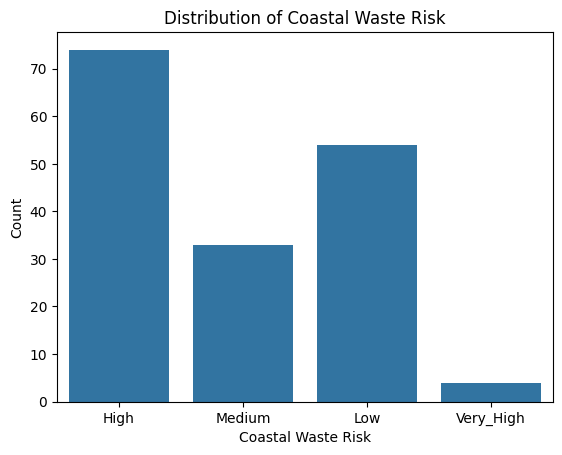

In [149]:
sns.countplot(data=df, x='Coastal_Waste_Risk')

plt.title('Distribution of Coastal Waste Risk')
plt.xlabel('Coastal Waste Risk')
plt.ylabel('Count')
plt.show()

# Top 5 countries with High Coastal Risk and Medium Coastal Risk

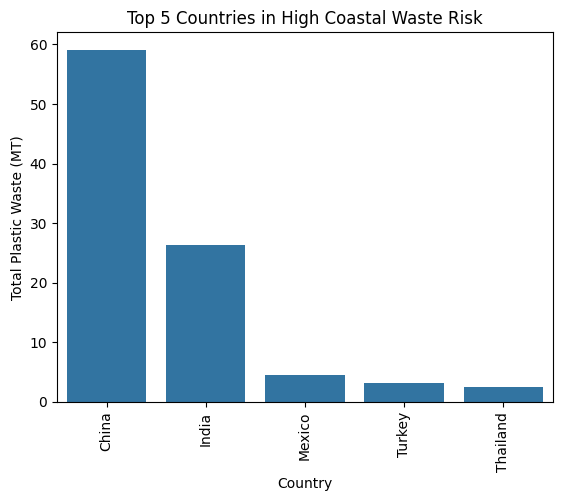

In [153]:
top_5_high_risk = df[df['Coastal_Waste_Risk'] == 'High'].nlargest(5, 'Total_Plastic_Waste_MT')
top_5_medium_risk = df[df['Coastal_Waste_Risk'] == 'Medium'].nlargest(5, 'Total_Plastic_Waste_MT')

sns.barplot(data=top_5_high_risk, x='Country', y='Total_Plastic_Waste_MT')
plt.title('Top 5 Countries in High Coastal Waste Risk')
plt.xlabel('Country')
plt.ylabel('Total Plastic Waste (MT)')
plt.xticks(rotation=90)
plt.show()


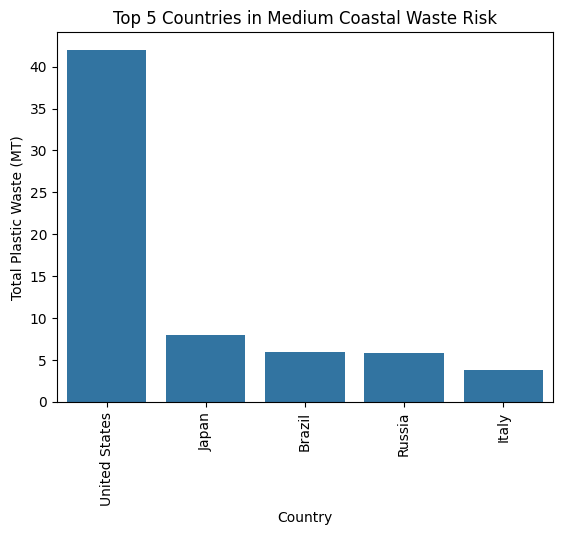

In [154]:
sns.barplot(data=top_5_medium_risk, x='Country', y='Total_Plastic_Waste_MT')
plt.title('Top 5 Countries in Medium Coastal Waste Risk')
plt.xlabel('Country')
plt.ylabel('Total Plastic Waste (MT)')
plt.xticks(rotation=90)
plt.show()

# Relationship between Total Plastic Waste and Recycling Rate

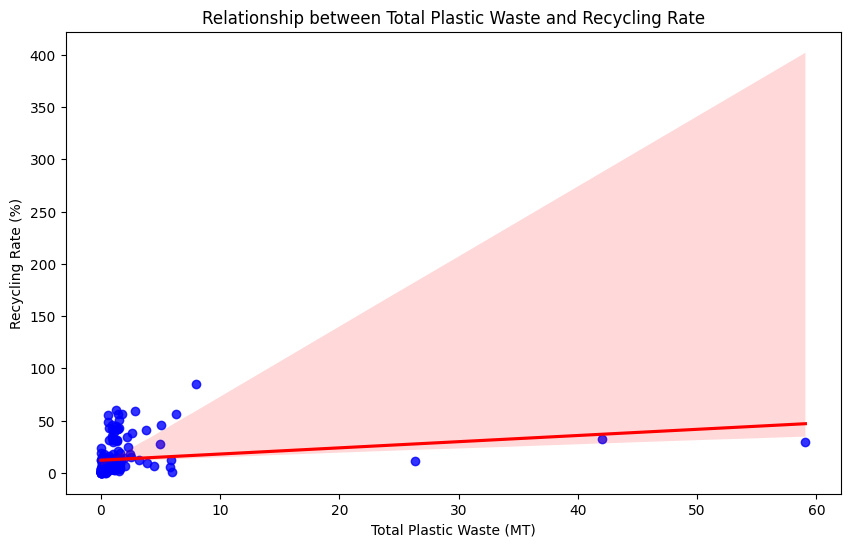

In [155]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Total_Plastic_Waste_MT', y='Recycling_Rate', scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

plt.title('Relationship between Total Plastic Waste and Recycling Rate')
plt.xlabel('Total Plastic Waste (MT)')
plt.ylabel('Recycling Rate (%)')
plt.show()

# Relationship between Per Capita Plastic and Recycling Rate

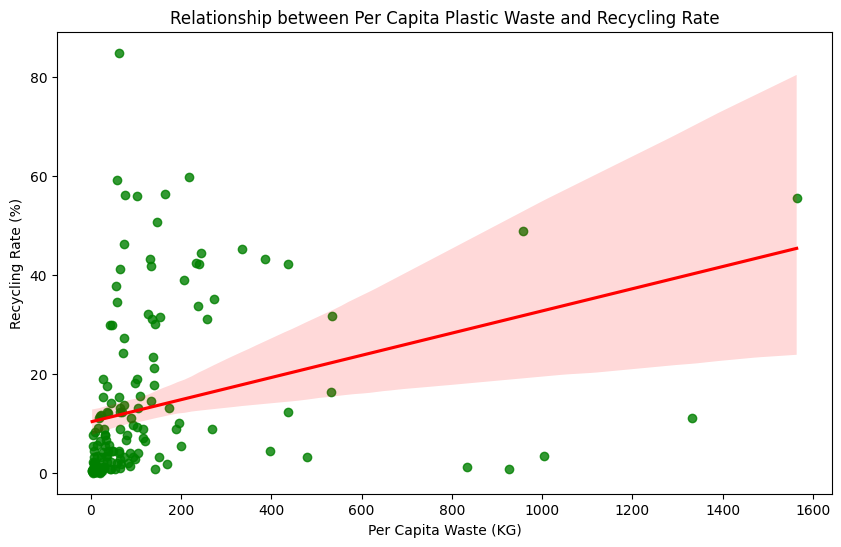

In [156]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Per_Capita_Waste_KG', y='Recycling_Rate', scatter_kws={'color': 'green'}, line_kws={'color': 'red'})

plt.title('Relationship between Per Capita Plastic Waste and Recycling Rate')
plt.xlabel('Per Capita Waste (KG)')
plt.ylabel('Recycling Rate (%)')
plt.show()

# Main Source of Plastic Waste

C:\Users\emon1\AppData\Local\Temp\ipykernel_7024\4282140406.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Main_Sources', order=df['Main_Sources'].value_counts().index, palette='cubehelix')


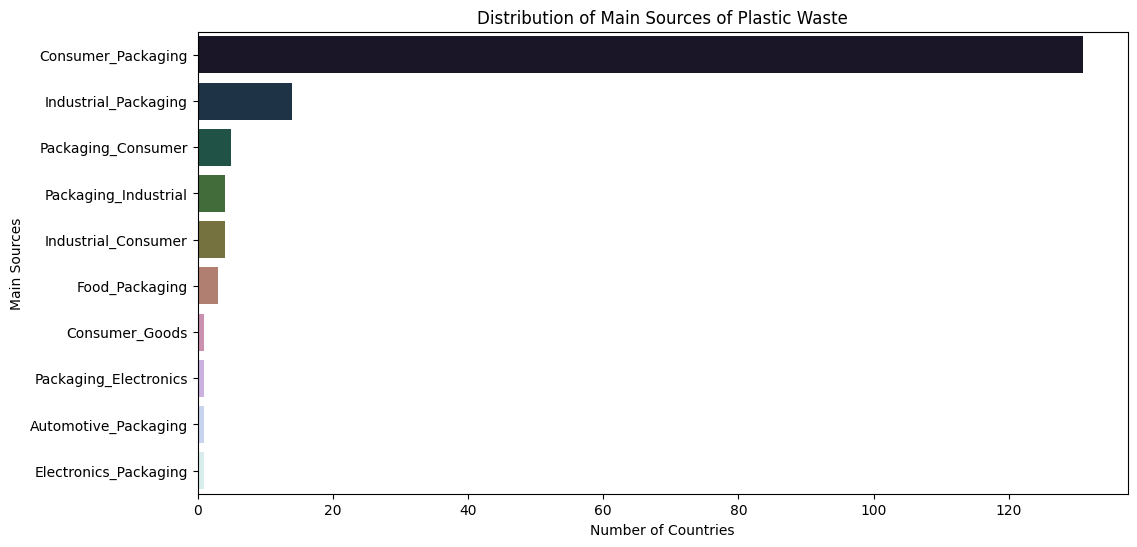

In [157]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='Main_Sources', order=df['Main_Sources'].value_counts().index, palette='cubehelix')

plt.title('Distribution of Main Sources of Plastic Waste')
plt.xlabel('Number of Countries')
plt.ylabel('Main Sources')
plt.show()

# Recycling Rate by Main source of Pastic Waste

C:\Users\emon1\AppData\Local\Temp\ipykernel_7024\1159788075.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Recycling_Rate', y='Main_Sources', palette='Set3')


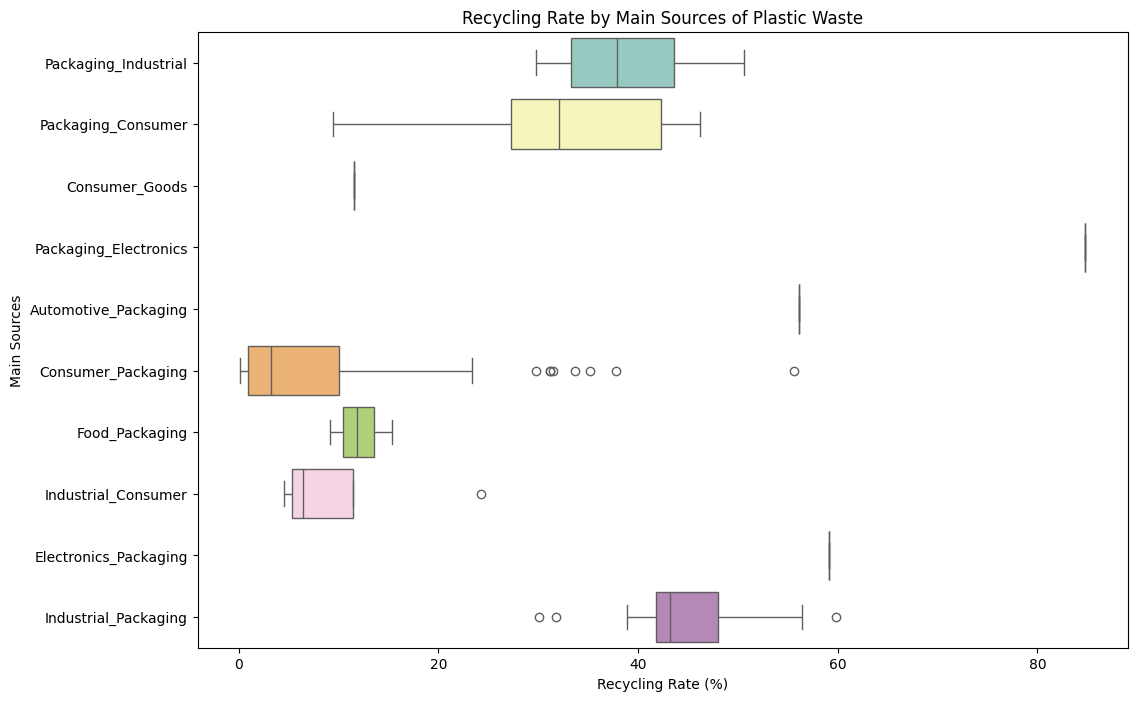

In [158]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Recycling_Rate', y='Main_Sources', palette='Set3')

plt.title('Recycling Rate by Main Sources of Plastic Waste')
plt.xlabel('Recycling Rate (%)')
plt.ylabel('Main Sources')
plt.show()

# Distribution of Total Plastic Waste by Coastal Waste Risk

C:\Users\emon1\AppData\Local\Temp\ipykernel_7024\3051291870.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Coastal_Waste_Risk', y='Total_Plastic_Waste_MT', palette='muted')


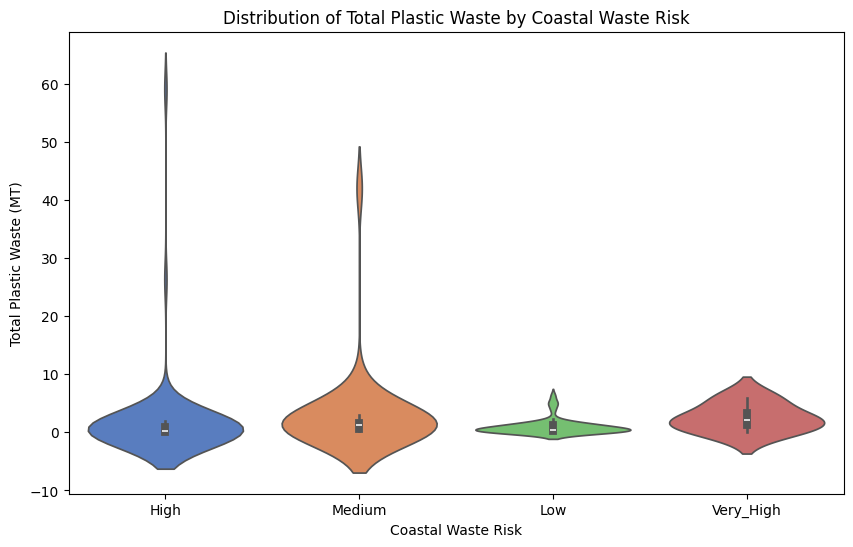

In [159]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Coastal_Waste_Risk', y='Total_Plastic_Waste_MT', palette='muted')

plt.title('Distribution of Total Plastic Waste by Coastal Waste Risk')
plt.xlabel('Coastal Waste Risk')
plt.ylabel('Total Plastic Waste (MT)')
plt.show()

# Avg Recycling Rate by Main Source of Plastic Waste

C:\Users\emon1\AppData\Local\Temp\ipykernel_7024\1212296234.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.pointplot(data=df, x='Main_Sources', y='Recycling_Rate', estimator='mean', palette='dark')


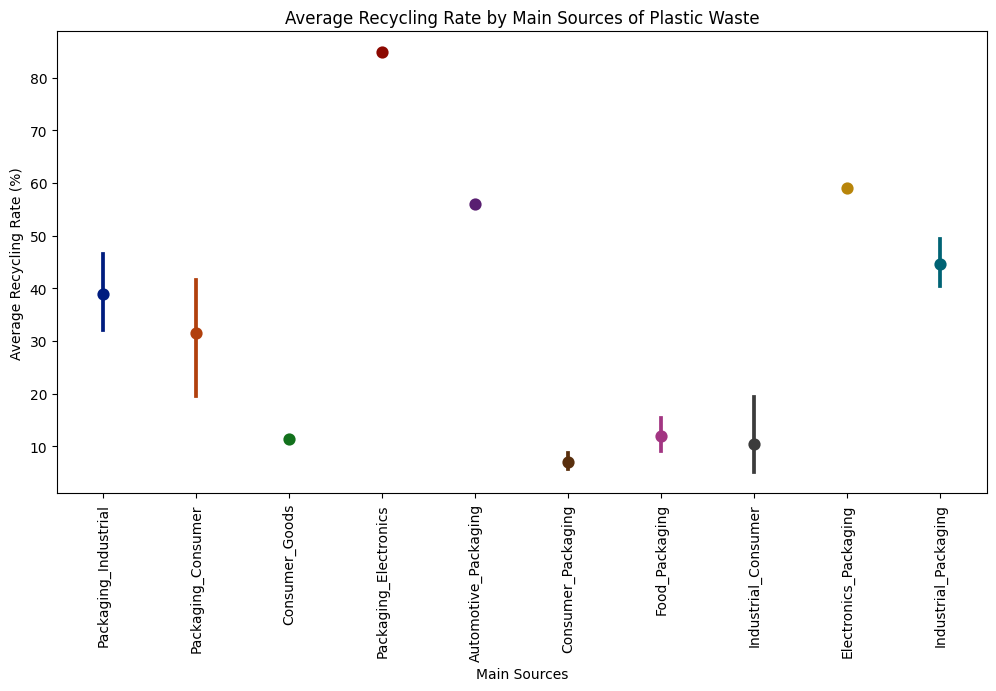

In [160]:
plt.figure(figsize=(12, 6))
sns.pointplot(data=df, x='Main_Sources', y='Recycling_Rate', estimator='mean', palette='dark')

plt.title('Average Recycling Rate by Main Sources of Plastic Waste')
plt.xlabel('Main Sources')
plt.ylabel('Average Recycling Rate (%)')
plt.xticks(rotation=90)
plt.show()

In [161]:
coastal_risk_counts = df['Coastal_Waste_Risk'].value_counts()
coastal_risk_counts

Coastal_Waste_Risk
High         74
Low          54
Medium       33
Very_High     4
Name: count, dtype: int64

In [162]:
high_risk = df[df['Coastal_Waste_Risk']=='High']['Coastal_Waste_Risk'].count()
low_risk = df[df['Coastal_Waste_Risk']=='Low']['Coastal_Waste_Risk'].count()
medium_risk = df[df['Coastal_Waste_Risk']=='Medium']['Coastal_Waste_Risk'].count()
very_high_risk = df[df['Coastal_Waste_Risk']=='Very_High']['Coastal_Waste_Risk'].count()

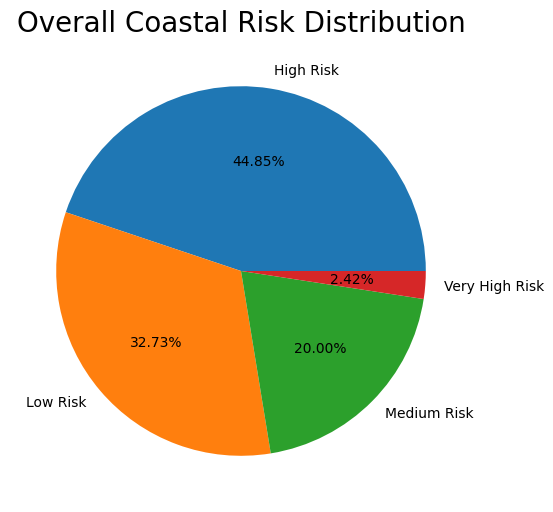

In [163]:
plt.figure(figsize=(10,6))

index_values = [high_risk, low_risk, medium_risk, very_high_risk]
index_labels = ['High Risk', 'Low Risk', 'Medium Risk', 'Very High Risk']

plt.pie(index_values, labels = index_labels, autopct='%2.2f%%')

plt.title('Overall Coastal Risk Distribution', fontsize=20)

plt.show()

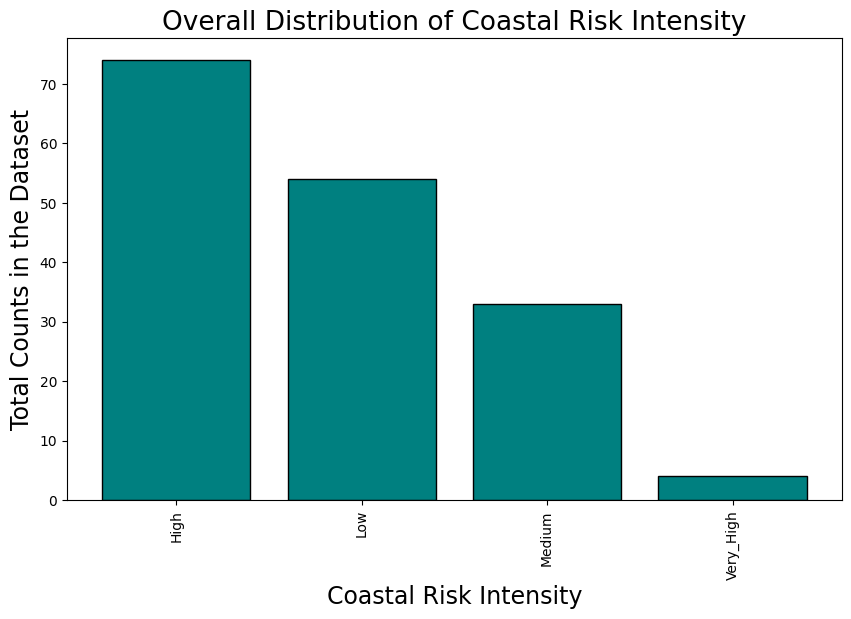

In [164]:
plt.figure(figsize=(10,6))

plt.bar(coastal_risk_counts.index, coastal_risk_counts.values, color='teal', edgecolor='black')

plt.xticks(coastal_risk_counts.index, coastal_risk_counts.index, rotation = 90)

plt.xlabel('Coastal Risk Intensity', fontsize=17)
plt.ylabel('Total Counts in the Dataset', fontsize=17)

plt.title('Overall Distribution of Coastal Risk Intensity', fontsize=19)

plt.show()

In [165]:
main_sources_counts = df['Main_Sources'].value_counts()
main_sources_counts

Main_Sources
Consumer_Packaging       131
Industrial_Packaging      14
Packaging_Consumer         5
Packaging_Industrial       4
Industrial_Consumer        4
Food_Packaging             3
Consumer_Goods             1
Packaging_Electronics      1
Automotive_Packaging       1
Electronics_Packaging      1
Name: count, dtype: int64

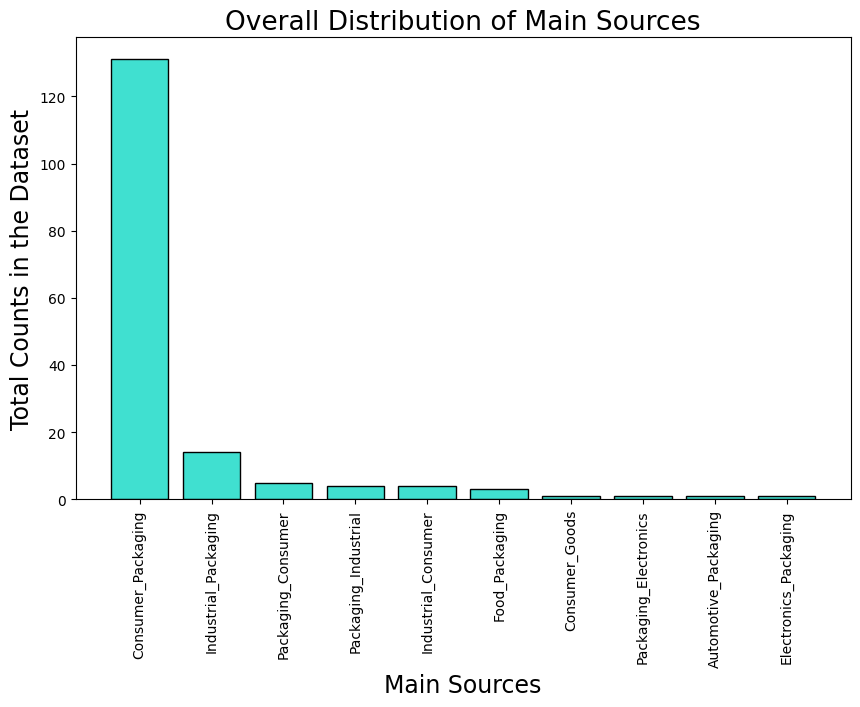

In [166]:
plt.figure(figsize=(10,6))

plt.bar(main_sources_counts.index, main_sources_counts.values, color='turquoise', edgecolor='black')

plt.xticks(main_sources_counts.index, main_sources_counts.index, rotation = 90)

plt.xlabel('Main Sources', fontsize=17)
plt.ylabel('Total Counts in the Dataset', fontsize=17)

plt.title('Overall Distribution of Main Sources', fontsize=19)

plt.show()

# World Map EDA 🗺️🆕💯

In [167]:
df.columns

Index(['Country', 'Total_Plastic_Waste_MT', 'Main_Sources', 'Recycling_Rate',
       'Per_Capita_Waste_KG', 'Coastal_Waste_Risk'],
      dtype='object')

In [ ]:
import geopandas as gpd

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world = world.merge(df, left_on='name', right_on='Country', how='left')

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)

world.plot(column='Per_Capita_Waste_KG', ax=ax, legend=True, cmap='viridis',legend_kwds={'label': "Per_Capita_Waste_KG",'orientation': "horizontal"})

plt.title('World Distribution of Per_Capita_Waste_KG', fontsize=16)
plt.show()

In [ ]:
import geopandas as gpd

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world = world.merge(df, left_on='name', right_on='Country', how='left')

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)

world.plot(column='Recycling_Rate', ax=ax, legend=True, cmap='viridis',legend_kwds={'label': "Recycling_Rate", 'orientation': "horizontal"})

plt.title('World Distribution of Recycling_Rate', fontsize=16)
plt.show()

In [ ]:
import geopandas as gpd

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world = world.merge(df, left_on='name', right_on='Country', how='left')

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)

world.plot(column='Total_Plastic_Waste_MT', ax=ax, legend=True, cmap='viridis', legend_kwds={'label': "Total_Plastic_Waste_MT", 'orientation': "horizontal"})

plt.title('World Distribution of Total_Plastic_Waste_MT', fontsize=16)
plt.show()

In [ ]:
import geopandas as gpd

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world = world.merge(df, left_on='name', right_on='Country', how='left')

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)

world.plot(column='Coastal_Waste_Risk', ax=ax, legend=True, cmap='viridis')

plt.title('World Distribution of Coastal_Waste_Risk', fontsize=16)
plt.show()

# Classification Model 1: RandomForest Classifier🔝

In [171]:
from sklearn.preprocessing import LabelEncoder
df['Coastal_Waste_Risk'] = LabelEncoder().fit_transform(df['Coastal_Waste_Risk'])
df['Coastal_Waste_Risk']

0      0
1      2
2      0
3      2
4      1
      ..
160    0
161    0
162    0
163    0
164    0
Name: Coastal_Waste_Risk, Length: 165, dtype: int32

In [172]:
df['Main_Sources'] = LabelEncoder().fit_transform(df['Main_Sources'])
df['Main_Sources']

0      9
1      7
2      1
3      8
4      0
      ..
160    2
161    2
162    2
163    2
164    2
Name: Main_Sources, Length: 165, dtype: int32

In [173]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [174]:
features = df.drop(columns=['Country', 'Main_Sources'])
target = df['Main_Sources']

In [175]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=29)

In [176]:
scaler = StandardScaler()

In [177]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [178]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=29)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=29)

In [179]:
y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_rf

array([2, 2, 9, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [180]:
accuracy_score(y_test, y_pred_rf)

0.8181818181818182

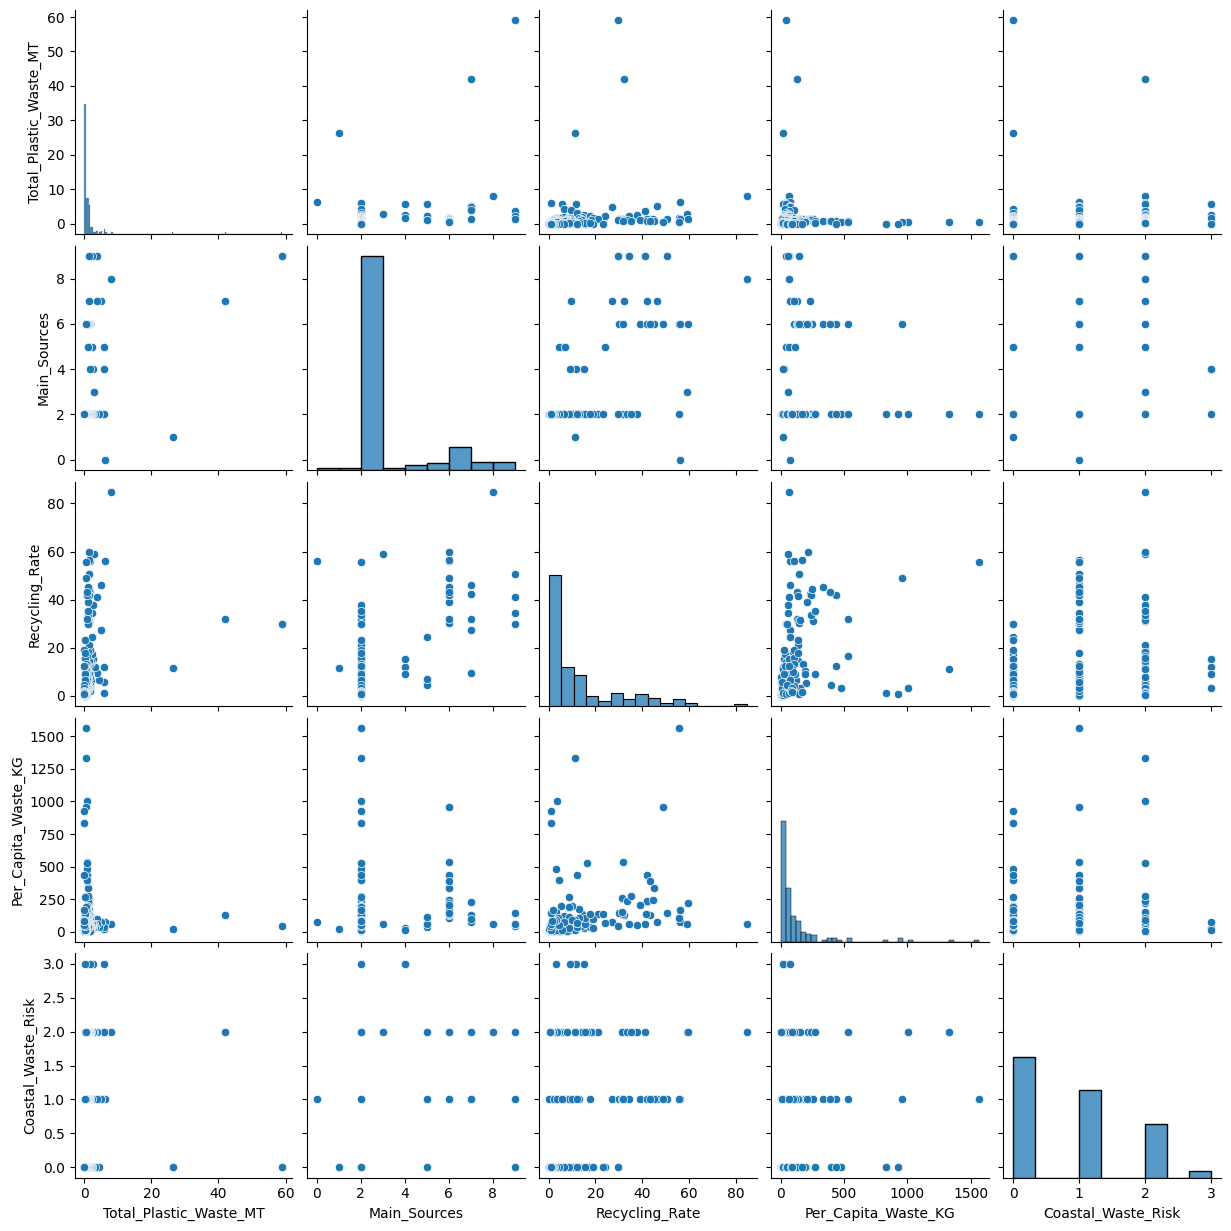

In [181]:
sns.pairplot(df)

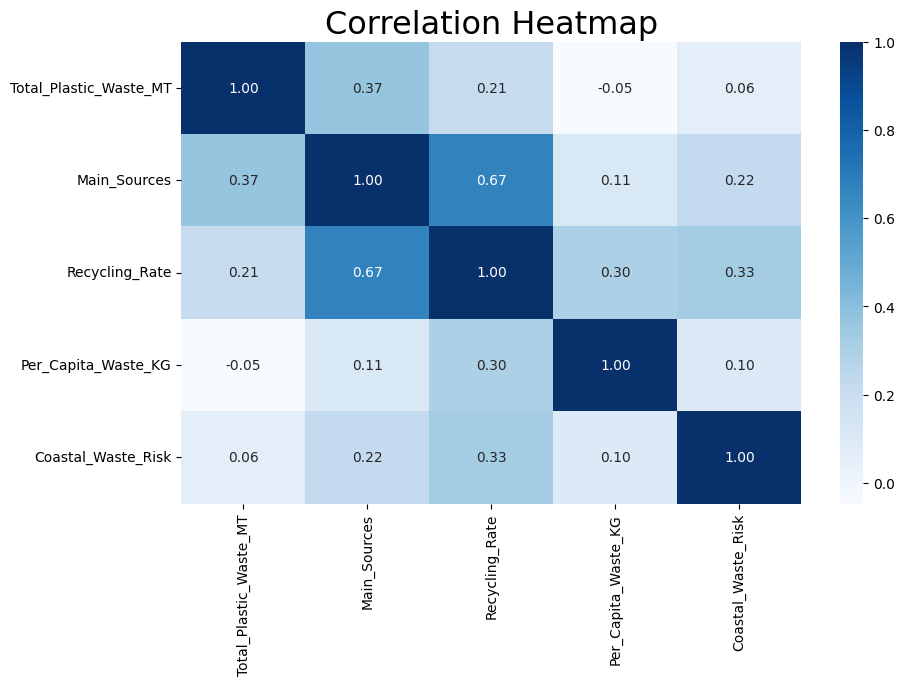

In [182]:
plt.figure(figsize=(10,6))
corr_matrix = df.drop(columns=['Country']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt='.2f')
plt.title('Correlation Heatmap', fontsize=23)
plt.show()